### Importing necessary Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

insta_data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Instagram Influencers Analysis\instagram.csv')
insta_data.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


### Exploratory Data Analysis

In [2]:
insta_data.shape

(1000, 8)

In [3]:
insta_data.columns

Index(['Influencer insta name', 'instagram name', 'category_1', 'category_2',
       'Followers', 'Audience country(mostly)', 'Authentic engagement\r\n',
       'Engagement avg\r\n'],
      dtype='object')

In [4]:
insta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [5]:
insta_data.describe().T

,count,unique,top,freq
Influencer insta name,1000,997,angelinajolie,2
instagram name,979,975,Bruno Goes 🎭,2
category_1,892,31,Music,235
category_2,287,27,Cinema & Actors/actresses,59
Followers,1000,411,6M,11
Audience country(mostly),986,32,United States,279
Authentic engagement\r\n,1000,850,1.1M,22
Engagement avg\r\n,1000,778,1.1M,28


In [6]:
insta_data.isnull().sum()

Influencer insta name         0
instagram name               21
category_1                  108
category_2                  713
Followers                     0
Audience country(mostly)     14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

### Data Preprocessing

In [7]:
insta_data.drop_duplicates(subset=['Influencer insta name'],inplace=True)

In [8]:
insta_data.rename({'category_1':'Category','Audience country(mostly)':'Audience Country'}, axis=1,inplace=True)
insta_data.rename({'Subscribers':'Followers',},axis=1,inplace=True)

In [9]:
insta_data = insta_data.drop(['Influencer insta name','Authentic engagement\r\n'],axis=1)

In [10]:
insta_data.head()

,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M


In [11]:
insta =['Followers','Engagement avg\r\n']

In [12]:
import re

In [13]:
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [14]:
def update(data,data_update):
    for i in data_update:
        data['new'+i]=data[i].apply(convert)
        data['new'+i]=data['new'+i].apply(lambda x: "".join(x))
        data['new'+i]=pd.to_numeric(data['new'+i])
        data['new'+i]=np.where(['M' in j for j in data[i]],data['new'+i]*1000000,
                               np.where(['K' in j1 for j1 in data[i]],data['new'+i]*1000,data['new'+i]))
    return data

In [15]:
update(insta_data,insta)

,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n,newFollowers,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K,12700000.0,542300.0
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K,18800000.0,377900.0
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M,13500000.0,1400000.0
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M,11100000.0,3100000.0
...,...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,8.6M,136100000.0,8600000.0
996,zidane,Sports with a ball,NaN,31.2M,Spain,744.1K,31200000.0,744100.0
997,KAI,Music,NaN,13.9M,Indonesia,1.6M,13900000.0,1600000.0
998,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,885.5K,8200000.0,885500.0


#### Engagement rate : the Percentage of Followers who really engages with the content posted by Influencers
Why ER is so Important?
1) good ER means your content is making an impact on audience(they really like you)

2) The higher the engagement ,the more likely it is that the content will be boosted in the newsfeed and attracting more eyes.

In [16]:
insta_data['Engagement Rate']=np.round((insta_data['newEngagement avg\r\n']/insta_data['newFollowers'])*100,3)

In [17]:
insta_data['Followers'].unique()

array(['48.5M', '12.7M', '18.8M', '13.5M', '11.1M', '7.9M', '25M', '3M',
       '4.9M', '4.1M', '13.2M', '6.5M', '19.8M', '27.9M', '58.3M',
       '17.2M', '7.2M', '8.8M', '28.9M', '8.2M', '13.6M', '40.5M',
       '49.7M', '34.2M', '2.6M', '8.3M', '31.5M', '10M', '12M', '61.1M',
       '5.1M', '10.8M', '22.4M', '13.4M', '15.8M', '21.1M', '61.8M', '8M',
       '9.1M', '6.8M', '17.6M', '27M', '16.2M', '12.4M', '9.2M', '5.6M',
       '8.1M', '24.1M', '15.2M', '6.7M', '30M', '6.3M', '6.1M', '21.9M',
       '5.5M', '7.7M', '39M', '16.3M', '12.6M', '13.9M', '14.9M', '20.3M',
       '17.8M', '22.6M', '35.5M', '19M', '11.4M', '34.5M', '57.5M',
       '10.7M', '8.5M', '27.4M', '13M', '302.3M', '9.7M', '28M', '9.5M',
       '21.5M', '6.6M', '14.6M', '13.3M', '21.4M', '23.1M', '14.1M',
       '25.3M', '30.5M', '38.5M', '125.1M', '10.4M', '16M', '35.4M',
       '20.2M', '7.1M', '50.7M', '50.6M', '14.3M', '25.2M', '16.8M',
       '246.9M', '16.4M', '14.2M', '17.7M', '7.8M', '101.7M', '11.5M',
     

In [18]:
insta_data['Followers'].value_counts()

6M        11
9.7M      10
13.9M      9
5.5M       9
8.2M       9
          ..
41.2M      1
64.8M      1
40.1M      1
21.3M      1
136.1M     1
Name: Followers, Length: 411, dtype: int64

In [19]:
insta_data['Followers'].str[-1].unique()


array(['M'], dtype=object)

In [20]:
insta_data['newFollowers']=insta_data['newFollowers']/1000000

In [21]:
insta_data = insta_data.drop(['Engagement avg\r\n','newEngagement avg\r\n'],axis=1)

In [22]:
insta_data = insta_data.drop(['category_2'],axis=1)

In [23]:
insta_data.head()

,instagram name,Category,Followers,Audience Country,newFollowers,Engagement Rate
0,433,Sports with a ball,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,12.7M,Indonesia,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,18.8,2.010
3,Joy,Lifestyle,13.5M,Indonesia,13.5,10.370
4,Jaehyun,NaN,11.1M,Indonesia,11.1,27.928


In [24]:
insta_data.sort_values(by='newFollowers',ascending=False,ignore_index=True)

,instagram name,Category,Followers,Audience Country,newFollowers,Engagement Rate
0,Instagram,Photography,487.2M,India,487.2,0.096
1,Cristiano Ronaldo,Sports with a ball,419.6M,India,419.6,1.668
2,Kylie 🤍,Fashion,323.3M,United States,323.3,3.805
3,Leo Messi,Sports with a ball,315.4M,Argentina,315.4,1.680
4,Selena Gomez,Music,308.2M,United States,308.2,1.428
...,...,...,...,...,...,...
992,Drew Starkey,NaN,3.2M,United States,3.2,37.500
993,GeorgeNotFound,NaN,3.1M,United States,3.1,35.484
994,설인아 sᴇᴏʀɪɴᴀ,Lifestyle,3M,South Korea,3.0,33.260
995,HAECHAN,NaN,2.7M,NaN,2.7,77.778


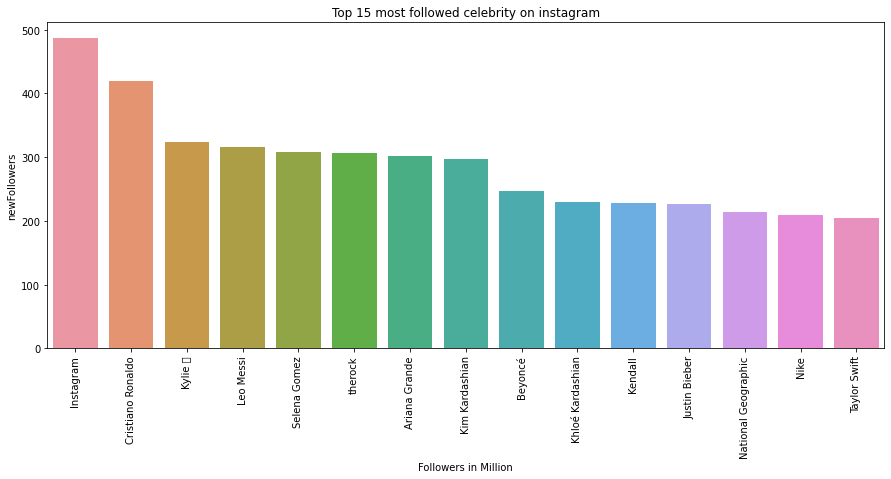

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x='instagram name',y='newFollowers',data=insta_data.sort_values(by='newFollowers', ascending=False).head(15))
plt.xticks(rotation = 90)
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
plt.show()

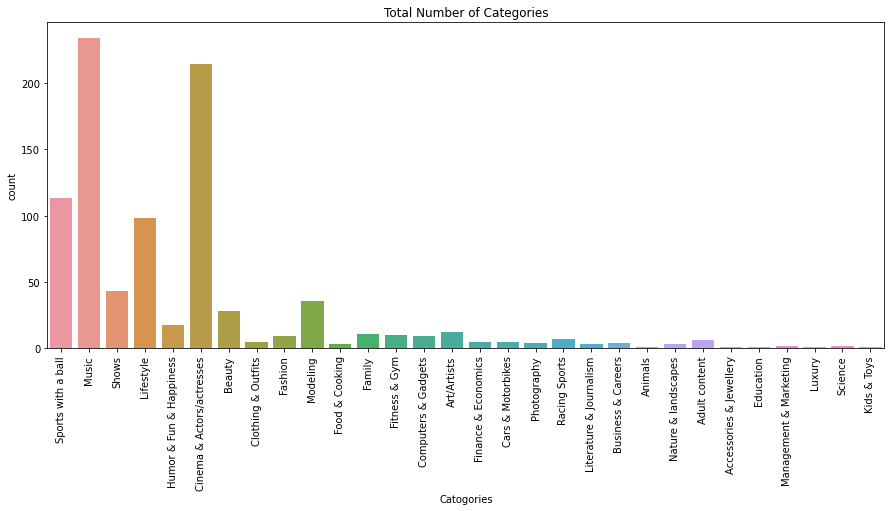

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Category', data=insta_data)
plt.xticks(rotation = 90)
plt.title('Total Number of Categories')
plt.xlabel('Catogories')
plt.show()

In [30]:
insta_data['Audience Country'].unique()

array(['Spain', 'Indonesia', 'Russia', 'Brazil', 'Poland', 'South Korea',
       'United States', 'Thailand', 'India', 'Iraq', 'Morocco', 'Turkey',
       nan, 'Mexico', 'Chile', 'Iran', 'Italy', 'Colombia', 'Argentina',
       'Philippines', 'United Kingdom', 'Germany', 'Nigeria', 'Serbia',
       'Albania', 'United Arab Emirates', 'China', 'France', 'Japan',
       'Egypt', 'Syria', 'Algeria', 'Ukraine'], dtype=object)

In [31]:
insta_data['Audience Country'].value_counts()

United States           279
Brazil                  151
India                   148
Indonesia               134
Mexico                   45
Spain                    34
Russia                   24
Argentina                23
Iran                     23
United Kingdom           20
Turkey                   16
Italy                    13
Colombia                 13
South Korea              13
Philippines               7
France                    6
Thailand                  6
Iraq                      5
Egypt                     5
Germany                   3
Morocco                   3
Nigeria                   2
Japan                     2
Chile                     1
Algeria                   1
Syria                     1
Serbia                    1
China                     1
United Arab Emirates      1
Albania                   1
Poland                    1
Ukraine                   1
Name: Audience Country, dtype: int64

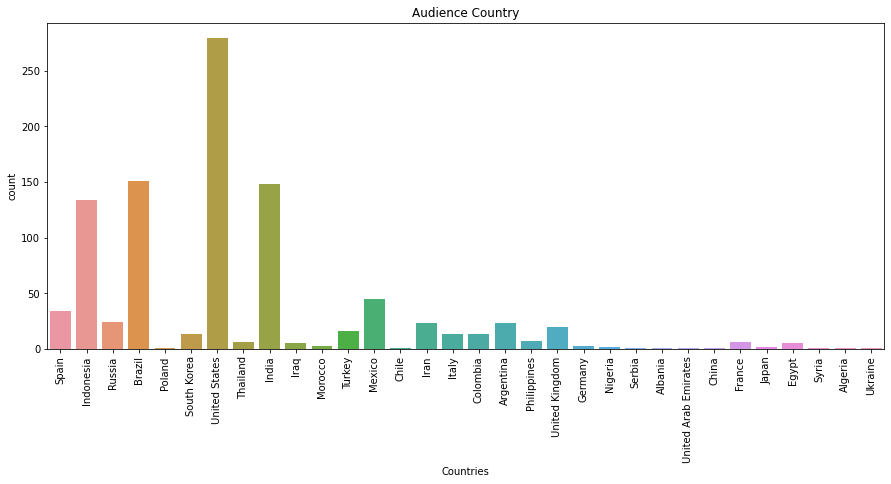

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Audience Country', data=insta_data)
plt.xticks(rotation = 90)
plt.title('Audience Country')
plt.xlabel('Countries')
plt.show()

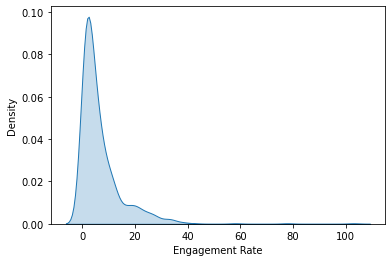

In [33]:
sns.kdeplot(x='Engagement Rate', data=insta_data, shade=True);

In [34]:
insta_data['newFollowers'].info()

<class 'pandas.core.series.Series'>
Int64Index: 997 entries, 0 to 999
Series name: newFollowers
Non-Null Count  Dtype  
--------------  -----  
997 non-null    float64
dtypes: float64(1)
memory usage: 15.6 KB


In [35]:
insta_data['newFollowers'].describe()

count    997.000000
mean      25.539619
std       40.586338
min        2.600000
25%        9.000000
50%       14.600000
75%       26.500000
max      487.200000
Name: newFollowers, dtype: float64

In [36]:
insta_data['newFollowers'].quantile(0.9)

47.7

In [37]:
def for_mini_followers_instagram(coun,cat):
    data1=insta_data[insta_data['Audience Country']==coun]
    data_mini=data1[data1['newFollowers']<60]
    return data_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

In [38]:
for_mini_followers_instagram('United States','Fashion')

,instagram name,Audience Country,Engagement Rate
558,loren gray,United States,1.01


In [39]:
for_mini_followers_instagram('India','Music')

,instagram name,Audience Country,Engagement Rate
705,Olivia Rodrigo,India,15.284
992,Zayn Malik,India,12.918
242,djsnake,India,4.721
118,Bebe Rexha,India,3.028
876,Tamannaah Bhatia,India,2.528
216,Darshan Raval #Goriye,India,1.683
604,marshmello,India,1.392
581,Madhuri Dixit,India,1.121
824,shreyaghoshal,India,0.601
333,Guru Randhawa,India,0.430


In [40]:
for_mini_followers_instagram('Russia','Lifestyle')

,instagram name,Audience Country,Engagement Rate
534,Валерия Чекалина,Russia,8.793


In [41]:
def for_mega_followers_instagram(coun,cat):
    data1=insta_data[insta_data['Audience Country']==coun]
    data_mega=data1[data1['newFollowers']>60]
    return data_mega.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]

In [42]:
for_mega_followers_instagram('United States','Fashion')

,instagram name,Audience Country,Engagement Rate
510,Kylie 🤍,United States,3.805
494,Kim Kardashian,United States,0.978


In [43]:
for_mega_followers_instagram('India','Music')

,instagram name,Audience Country,Engagement Rate
818,Shakira,India,1.317
670,Neha Kakkar (Mrs. Singh),India,1.131
458,Justin Bieber,India,0.281
